In [28]:
import numpy as np 
from sklearn.datasets import load_iris
import pandas as pd 

iris= load_iris()
df= pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species']= iris.target

print('iris.target:', iris.target)
display(df.head())

iris.target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df['species']=df['species'].map({0:'setosa',1:'versicolor', 2:'virginica'})
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df.loc[5:10,'sepal length (cm)']=np.nan
df.head(12)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,NaN,3.9,1.7,0.4,setosa
6,NaN,3.4,1.4,0.3,setosa
7,NaN,3.4,1.5,0.2,setosa
8,NaN,2.9,1.4,0.2,setosa
9,NaN,3.1,1.5,0.1,setosa


In [31]:
display(df.isnull().sum())

sepal length (cm)    6
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer 

imputer= SimpleImputer(strategy='mean')
df[['sepal length(cm)']]= imputer.fit_transform(df[['sepal length (cm)']])


In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder= LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sepal length(cm)
0,5.1,3.5,1.4,0.2,0,5.1
1,4.9,3.0,1.4,0.2,0,4.9
2,4.7,3.2,1.3,0.2,0,4.7
3,4.6,3.1,1.5,0.2,0,4.6
4,5.0,3.6,1.4,0.2,0,5.0


In [34]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

df = pd.DataFrame({
    'species': ['setosa', 'versicolor', 'virginica', 'setosa','virginica']
})

print('Original DtaFrame: ')
print(df)

Original DtaFrame: 
      species
0      setosa
1  versicolor
2   virginica
3      setosa
4   virginica


In [35]:
label_encoder=LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])
print('After label encoder(single columns):')
display(df)

After label encoder(single columns):


,species,species_encoded
0,setosa,0
1,versicolor,1
2,virginica,2
3,setosa,0
4,virginica,2


In [36]:
decoded_species= label_encoder.inverse_transform(df['species_encoded'])
print('decoded back to original label')
display(decoded_species)

decoded back to original label


array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [37]:
mapping ={label:idx for idx, label in enumerate(df['species'].unique())}
df['species_mapped'] =df['species'].map(mapping)
print('label encoding using map')
display(df)

label encoding using map


,species,species_encoded,species_mapped
0,setosa,0,0
1,versicolor,1,1
2,virginica,2,2
3,setosa,0,0
4,virginica,2,2


In [38]:
df_multi=pd.DataFrame({
    'species':['setosa', 'versicolor', 'virginica'],
    'color':['red', 'green', 'blue']
})

In [39]:
for i,j in enumerate([12,22,2]):
    print(i,j)

0 12
1 22
2 2


In [40]:
import pandas as pd
df_multi= pd.DataFrame({
    'species':['setosa','versicolor','virginica'],
    'color':['red','green','blue']
})

for col in df_multi.select_dtypes(include=['object']).columns: 
    df_multi[col]= LabelEncoder().fit_transform(df_multi[col]) 


print("\n label encoding multiple columns:")
print(df_multi)


 label encoding multiple columns:
   species  color
0        0      2
1        1      1
2        2      0


In [41]:
df_multi2= pd.DataFrame({
    'species':['setosa','versicolor','virginica'],
    'color':['red','green','blue']
})

df_multi2= df_multi2.apply(LabelEncoder().fit_transform)
print("\n apply lebel encoder on categrical at once:")
display(df_multi2)


 apply lebel encoder on categrical at once:


,species,color
0,0,2
1,1,1
2,2,0


In [42]:
label_encoder= LabelEncoder()
label_encoder.fit(df['species'])
df['species_encoded2']= label_encoder.transform(df['species'])
print("\nfit and transform seperately")
display(df)


fit and transform seperately


,species,species_encoded,species_mapped,species_encoded2
0,setosa,0,0,0
1,versicolor,1,1,1
2,virginica,2,2,2
3,setosa,0,0,0
4,virginica,2,2,2


In [47]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 
one_hot_encoder= OneHotEncoder(sparse_output=False)
encoded_features =  one_hot_encoder.fit_transform(df[['species']])
display(encoded_features)

#convert to dataframe and concate with orginal

df_encoded= pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['species']))
df=pd.concat([df,df_encoded], axis=1)
df.drop(['species'] , axis=1,inplace=True)

display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [48]:
import numpy as np
from scipy import stats

iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species']= iris.target
display(df.head())

z_score = np.abs(stats.zscore(df[['sepal length (cm)', 'sepal width (cm)', 
                                  'petal length (cm)', 'petal width (cm)']]))

df_no_outliers = df[(z_score < 3).all(axis=1)]
print("After Z-score filtering, dataframe shape:", df_no_outliers.shape)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


After Z-score filtering, dataframe shape: (149, 5)


In [49]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR=Q3-Q1 

df_iqr=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

print("After IQR filtering :",df_iqr.shape)

After IQR filtering : (146, 5)


In [51]:
from scipy.stats.mstats import winsorize 

df_winsorized = df.copy()
cols =['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']

for col in cols:
    df_winsorized[col]=winsorize(df[col], limits=[0.05,0.05])


print("After Windorized:")
display(df_winsorized.head())

After Windorized:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df_manual= df[(df['sepal length (cm)'] <= 8) & (df['petal width (cm)'] >= 0.1)]
print("after manual thresholding: ", df_manual.shape)

after manual thresholding:  (150, 5)


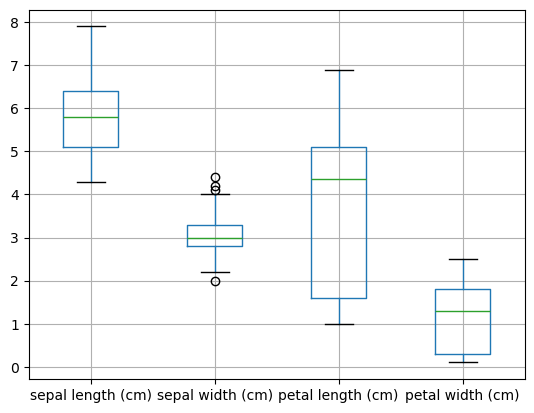

In [53]:
import matplotlib.pyplot as plt 

df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

In [54]:
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler()
df_scaled=df.copy()
cols= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_scaled[cols]= scaler.fit_transform(df[cols])
display(df_scaled.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.538462,1.0,-0.842857,-0.733333,0
1,-0.692308,0.0,-0.842857,-0.733333,0
2,-0.846154,0.4,-0.871429,-0.733333,0
3,-0.923077,0.2,-0.814286,-0.733333,0
4,-0.615385,1.2,-0.842857,-0.733333,0
